### Importing libraries

In [1]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

### Anova

In [3]:
treatment = pd.read_csv('../data/anova.csv', sep=';')
treatment.head()

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


<AxesSubplot:title={'center':'Horas'}, xlabel='[Remedio]'>

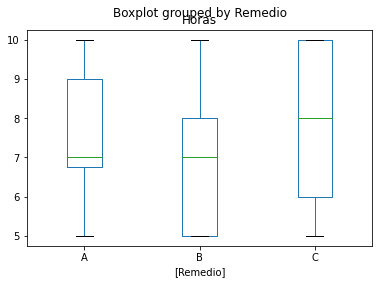

In [4]:
treatment.boxplot(by='Remedio', grid=False)

Creation of linear regression model and execution of the test.

In [5]:
model1 = ols('Horas ~ Remedio', data=treatment).fit()
results1 = sm.stats.anova_lm(model1)
# it's possible to notice that the p-value is bigger than 0.05 (Pr(>F)) 
# null hypothesis: there's no significant difference
results1

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


Creation of the second model and execution of the test, using more features.

In [6]:
model2 = ols('Horas ~ Remedio * Sexo', data=treatment).fit()
results2 = sm.stats.anova_lm(model2)
# none of the p-values show a significant difference
results2

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remedio:Sexo,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN


When there's a significant difference, it's possible to execute the Tukey's test. 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   -0.625 0.7861 -3.0803 1.8303  False
     A      C    0.375    0.9 -2.0803 2.8303  False
     B      C      1.0 0.5668 -1.4553 3.4553  False
---------------------------------------------------


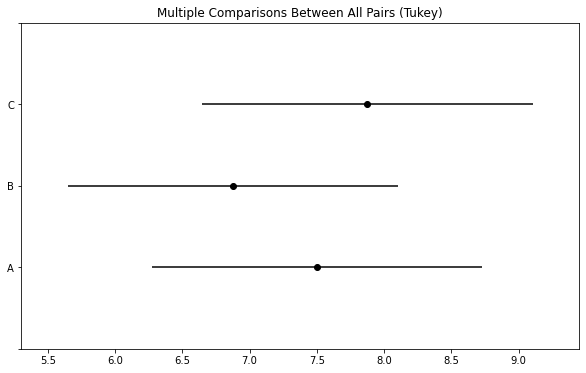

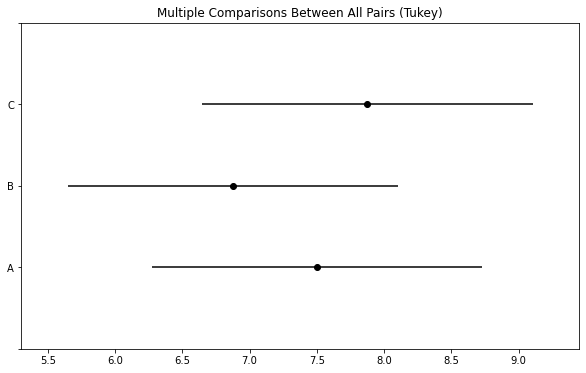

In [7]:
mc = MultiComparison(treatment['Horas'], treatment['Remedio'])
test_result = mc.tukeyhsd()
print(test_result)
test_result.plot_simultaneous()